# **<u><p style='text-align:center;'> CREDIT CARD FRAUD ANALYSIS DETECTION. </p></u>**
<b>Objectives.</b>
1. Exploratory Data Analysis (EDA):
   + Examine the distribution of transaction amounts and types.
   + Identify trends in transaction dates and locations.
   + Analyze the ratio of fraudulent to legitimate transactions.  
2. Pattern Recognition:
   + Use clustering techniques to group transactions and identify unusual patterns.
3. Fraud Detection Modeling:
   + Building machine learning algorithms models of build predictive models that can classify transactions as fraudulent or legitimate.
   + Evaluate model performance using metrics such as accuracy, precision, recall, F1 score and AUC-ROC .
4. Feature Importance Analysis:
   + Determine which features contribute most significantly to the detection of fraud.

In [2]:
#import libraries for manipulation.
import pandas as pd 
import numpy as np
#import libraries for visualization.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load the dataset.
cf = pd.read_csv('Datasets/credit_card_fraud_dataset.csv')

# 1. DATA OVERVIEW.

In [5]:
#Display the first 5 rows.
cf.head()

TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0

In [6]:
#Displays the data type of the all columns and their entry count in the dataframe.
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [7]:
#Checking for missing values.
cf.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [8]:
#Checking for duplicated rows.
cf.duplicated().sum()

0

# 2. EXPLORATORY DATA ANALYSIS (EDA).

In [10]:
#Shows the statistics of the dataframe.
cf.describe()

TransactionID         Amount     MerchantID        IsFraud
count  100000.000000  100000.000000  100000.000000  100000.000000
mean    50000.500000    2497.092666     501.676070       0.010000
std     28867.657797    1442.415999     288.715868       0.099499
min         1.000000       1.050000       1.000000       0.000000
25%     25000.750000    1247.955000     252.000000       0.000000
50%     50000.500000    2496.500000     503.000000       0.000000
75%     75000.250000    3743.592500     753.000000       0.000000
max    100000.000000    4999.770000    1000.000000       1.000000

In [11]:
#Count the occurrences of legitimate(0) and fraudulent(1) in the 'Isfraud' column.
isfraud_count = cf['IsFraud'].value_counts()
#Display the count occourrence of Isfraud column.
print("IsFraud count transactions, legitimate(0) and fraudulent(1):")
print(isfraud_count)

#Calculate the percentage of each legitimate(0) and fraudulent(1).
isfraud_ratio = cf['IsFraud'].value_counts(normalize=True) * 100
#Display ratio of fraudulent to legitimate transactions.
print("\nRatio of Legitimate(0) to Fraudulent(1) transactions:")
print(isfraud_ratio)

IsFraud count transactions, legitimate(0) and fraudulent(1):
IsFraud
0    99000
1     1000
Name: count, dtype: int64

Ratio of Legitimate(0) to Fraudulent(1) transactions:
IsFraud
0    99.0
1     1.0
Name: proportion, dtype: float64


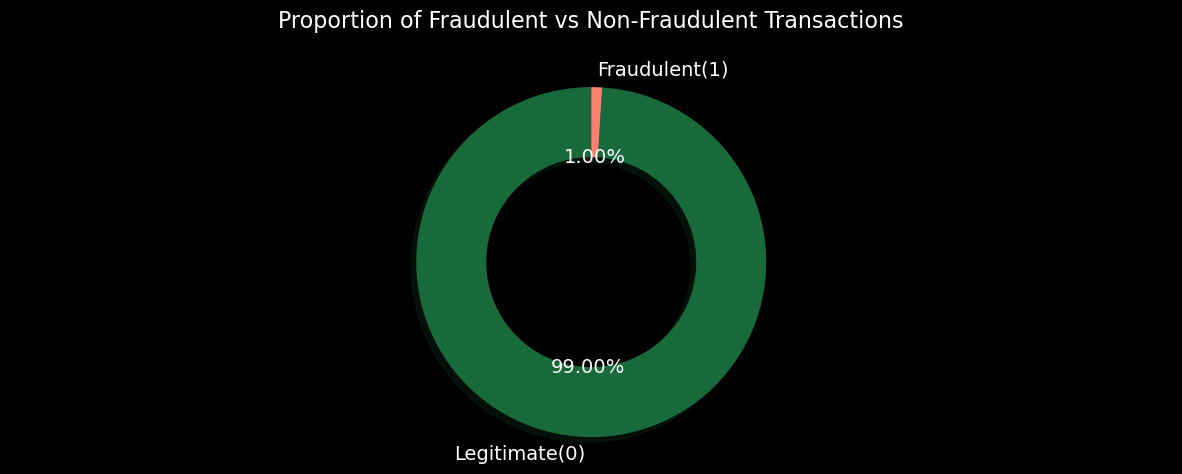

In [20]:
#Count and calculate the percentage of each legitimate(0) and fraudulent(1).
isfraud_count = cf['IsFraud'].value_counts()
isfraud_ratio = cf['IsFraud'].value_counts(normalize=True) * 100

#Define labels and colors.
labels = ['Legitimate(0)', 'Fraudulent(1)']
colors = ['#186a3b', 'salmon']

#Plotting the donut chart.
plt.figure(figsize=(15, 5), facecolor="black" #Set the axis background color to black.
          )
plt.pie(isfraud_count, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4),
        textprops={'color':'white', 'fontsize':14},shadow=True)

#Setting chart title.
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions',color='white', fontsize='16', pad=30)

#Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal') 

#Displaying the dount chart.
plt.show()

In [21]:
#Convert 'TransactionDate' column to datetime.
cf['TransactionDate'] = pd.to_datetime(cf['TransactionDate'])

#Extract year from 'TransactionDate' column.
cf['year'] = cf['TransactionDate'].dt.year

#Extract month in words from 'TransactionDate' column.
cf['Month'] = cf['TransactionDate'].dt.strftime('%B')

#Extract hour of the day 'TransactionDate' column.
cf['Hour'] = cf['TransactionDate'].dt.hour

#Extract hour in  AM/PM format 'TransactionDate' column.
cf['clocksystem'] = cf['Hour'].apply(lambda x: 'AM' if x < 12 else 'PM')

#Display the extracted resulting 4 columns.
print(cf[['TransactionDate','year','Month','Hour','clocksystem']].head(10))

             TransactionDate  year     Month  Hour clocksystem
0 2024-04-03 14:15:35.462794  2024     April    14          PM
1 2024-03-19 13:20:35.462824  2024     March    13          PM
2 2024-01-08 10:08:35.462834  2024   January    10          AM
3 2024-04-13 23:50:35.462850  2024     April    23          PM
4 2024-07-12 18:51:35.462858  2024      July    18          PM
5 2024-08-30 01:52:35.462867  2024    August     1          AM
6 2024-01-02 11:31:35.462875  2024   January    11          AM
7 2024-05-12 12:25:35.462885  2024       May    12          PM
8 2023-11-16 02:20:35.462894  2023  November     2          AM
9 2023-10-24 06:51:35.462901  2023   October     6          AM


In [23]:
#Count the occurrences of  years avaliable in the 'year' column.
years = cf.groupby('year').size()
#Display years avaliable and count on each.
print("Years avaliable and transaction count in each:")
print(years)

#Group by year and IsFraud then count transactions.
years = cf.groupby(['year', 'IsFraud']).size().unstack(fill_value=0)
#Renaming of columns.
years.columns = ['Legitimate(0)', 'Fraudulent(1)']
#Display the yearly counts of legitimate(0) and fraudulent(1) transactions.
print("\nYearly counts of Legitimate(0) and Fraudulent(1) transactions:")
print(years)

Years avaliable and transaction count in each:
year
2023    19551
2024    80449
dtype: int64

Yearly counts of Legitimate(0) and Fraudulent(1) transactions:
      Legitimate(0)  Fraudulent(1)
year                              
2023          19371            180
2024          79629            820


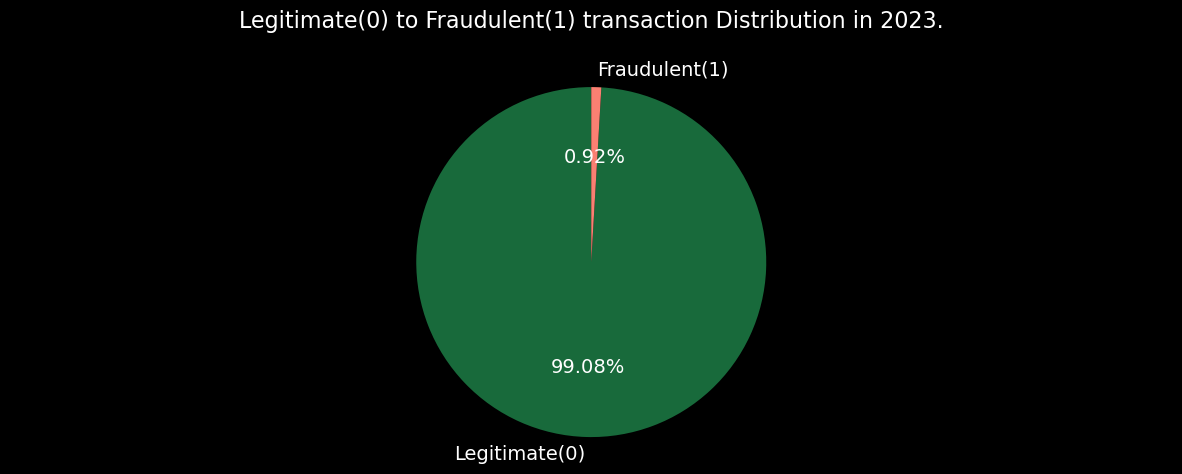

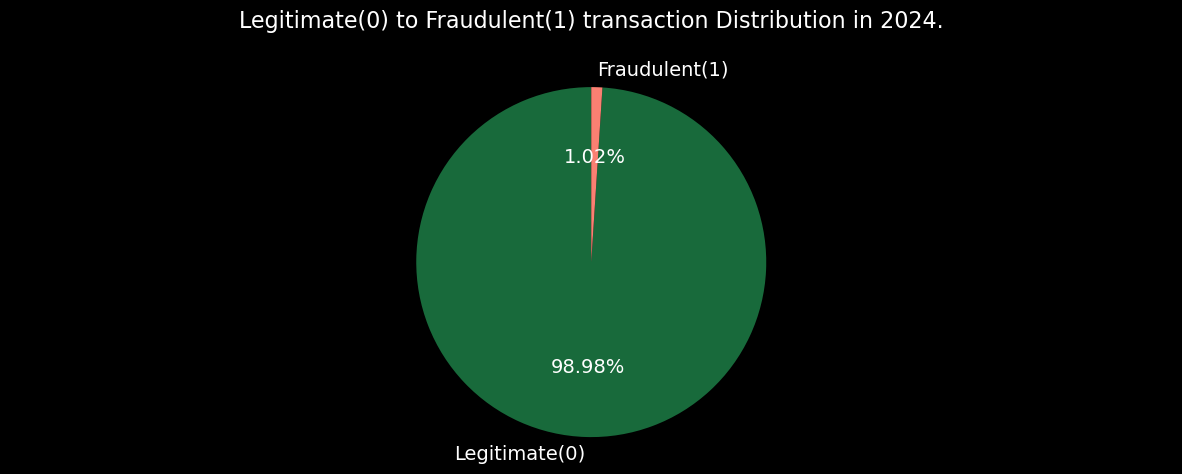

In [24]:
#Creating a Loop through each year to create separate pie charts for each years.
for year in years.index:
    #Defining and getting the data for the years(2023 & 2024).
    data = years.loc[year]
    labels = ['Legitimate(0)', 'Fraudulent(1)']
    colors = ['#186a3b', 'salmon']
    
    #Plotting the pie chart for both years.
    plt.figure(figsize=(15, 5),facecolor='black')
    plt.pie(data, labels= labels, colors=colors, autopct='%1.2f%%', startangle=90, textprops={'color':'white','fontsize':14})
    
    #Setting chart title and also customizing it.
    plt.title(f'Legitimate(0) to Fraudulent(1) transaction Distribution in {year}.',color='white',pad=30,fontsize='16')
    
    #Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal') 
    
    #Displaying the both pie chart.
    plt.show()

In [25]:
#Filter for transactions in 2023 and 2024 year.
filtered_data_year = cf[cf['year'].isin([2023, 2024])]

#Define the month order to reorder the data after grouping.
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#Groupiing by year and Month then count transactions and sort by month order define.
month_counts = ( filtered_data_year.groupby(['year', 'Month']) 
                .size()
                .reset_index(name='Transaction Count')  #Reseting the index so as to get a tidy DataFrame.
               )

#For easier readability sort by year and month order.
month_counts['Month'] = pd.Categorical(month_counts['Month'], categories=month_order, ordered=True)
month_counts = month_counts.sort_values(['year', 'Month']).reset_index(drop=True)

#Display the transaction counts for year 2023.
print("Transaction Counts for year 2023:")
print(month_counts[month_counts['year'] == 2023])

#Display the transaction counts for year 2024.
print("\nTransaction Counts for year 2024:")
print(month_counts[month_counts['year'] == 2024])

Transaction Counts for year 2023:
   year     Month  Transaction Count
0  2023   October               2871
1  2023  November               8136
2  2023  December               8544

Transaction Counts for year 2024:
    year      Month  Transaction Count
3   2024    January               8371
4   2024   February               7891
5   2024      March               8530
6   2024      April               8275
7   2024        May               8499
8   2024       June               8121
9   2024       July               8578
10  2024     August               8379
11  2024  September               8302
12  2024    October               5503


In [26]:
#Filtering for transactions in 2023 and 2024 year.
filtered_data_year = cf[cf['year'].isin([2023, 2024])]

#Define the month order to reorder the data after grouping.
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#Group by year, Month and IsFraud then count transactions.
month_counts = (filtered_data_year.groupby(['year', 'Month', 'IsFraud'])
                .size()
                .unstack(fill_value=0)
                .reset_index()  #Reseting the index so as to get a tidy DataFrame.
               )

#Renaming columns.
month_counts.columns = ['year', 'Month', 'Legitimate(0)', 'Fraudulent(1)']

#For easier readability sort by year and month order.
month_counts['Month'] = pd.Categorical(month_counts['Month'], categories=month_order, ordered=True)
month_counts = month_counts.sort_values(['year', 'Month']).reset_index(drop=True)

# Display the transaction counts for the year 2023
print("Transaction Counts for 2023 with legitimate and fraudulent:")
print(month_counts[month_counts['year'] == 2023])

# Display the transaction counts for the year 2024
print("\nTransaction Counts for 2024 with legitimate and fraudulent:")
print(month_counts[month_counts['year'] == 2024])

Transaction Counts for 2023 with legitimate and fraudulent:
   year     Month  Legitimate(0)  Fraudulent(1)
0  2023   October           2845             26
1  2023  November           8061             75
2  2023  December           8465             79

Transaction Counts for 2024 with legitimate and fraudulent:
    year      Month  Legitimate(0)  Fraudulent(1)
3   2024    January           8275             96
4   2024   February           7795             96
5   2024      March           8440             90
6   2024      April           8205             70
7   2024        May           8424             75
8   2024       June           8054             67
9   2024       July           8483             95
10  2024     August           8289             90
11  2024  September           8214             88
12  2024    October           5450             53


In [32]:
#Count the occurrences of  type of transcations avaliable in the 'TransactionType' column.
transactiontype_count = cf['TransactionType'].value_counts()
#Display the count of the transactiontype.
print(transactiontype_count)

TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64


Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64


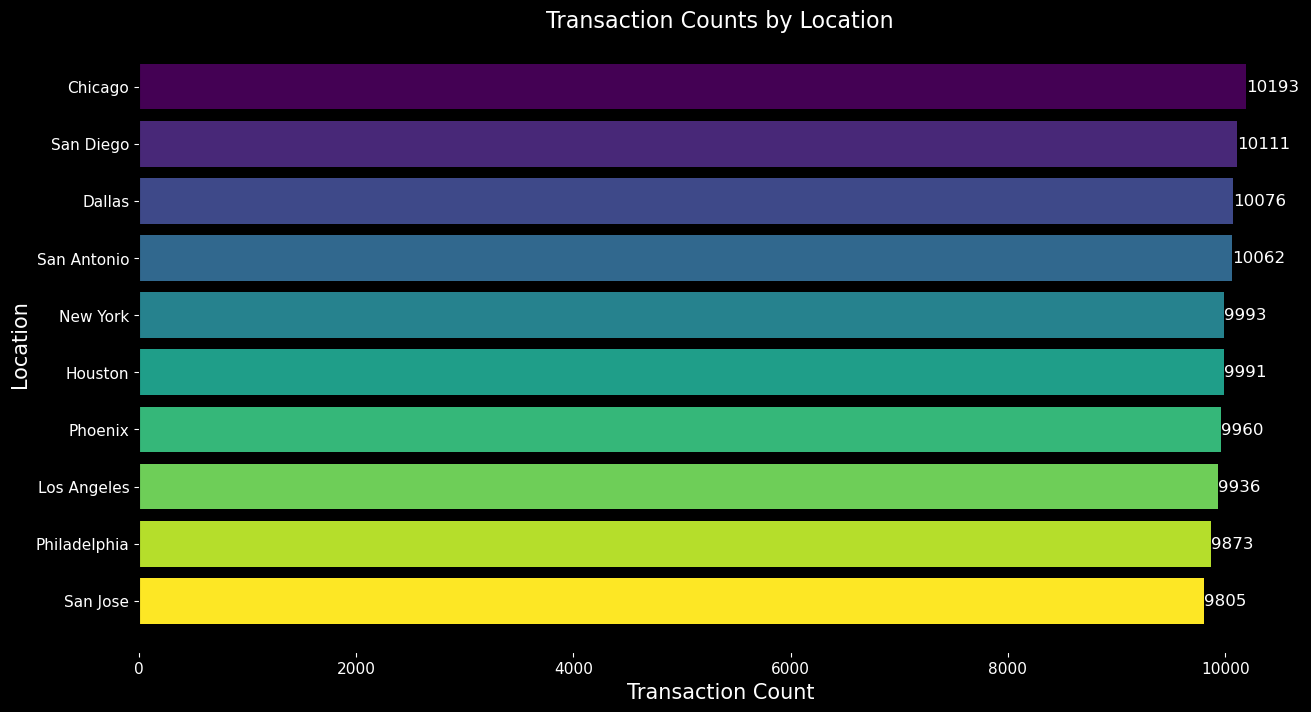

In [34]:
#Count the occurrences of locations in the 'Location' column.
location_count = cf['Location'].value_counts()
#Display the count of the locations.
print(location_count)

#Plotting a horizontal bar graph.
plt.figure(figsize=(15, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')

#Apply Viridis colormap.
colors = plt.cm.viridis(np.linspace(0, 1, len(location_count)))
bars = plt.barh(location_count.index, location_count.values, color=colors)

# Display values on top of the bars.
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', va='center', color='white', fontsize='12')

#Setting chart title and labels.
plt.title('Transaction Counts by Location', color='white', fontsize='16')
plt.xlabel('Transaction Count', color='white', fontsize='15')
plt.ylabel('Location', color='white', fontsize='15')

#Set tick parameters for white text.
ax.tick_params(colors='white', labelsize='11')

#Invert y-axis in descending order for readability.
ax.invert_yaxis()

#Display the horizontal bar chart.
plt.show()

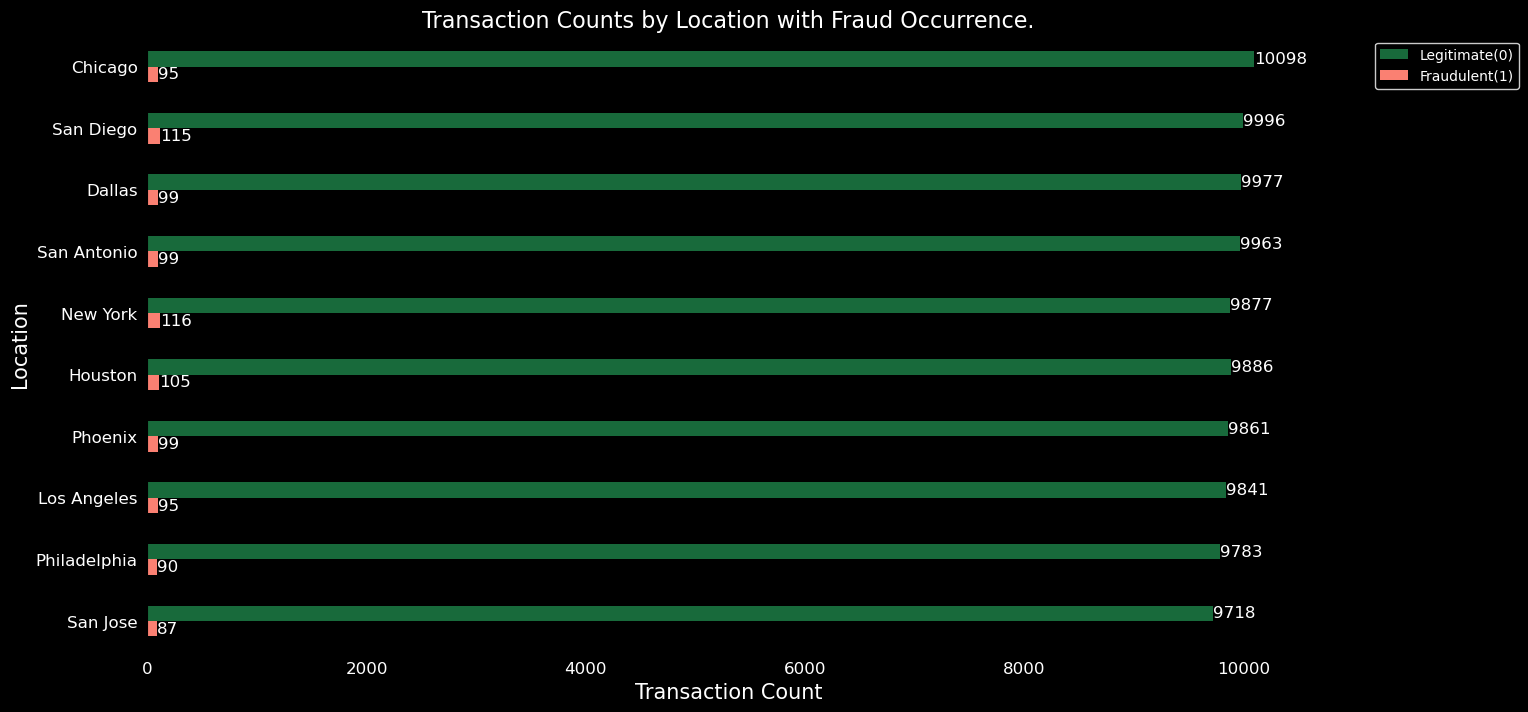

In [36]:
#Grouping data by 'Location' and 'IsFraud' to get the transaction counts per location.
location_fraud_counts = cf.groupby(['Location', 'IsFraud']).size().unstack(fill_value=0)

#Sort by the total number of transactions in each location for better visualization.
location_fraud_counts = location_fraud_counts.loc[location_fraud_counts.sum(axis=1).sort_values(ascending=False).index]

#Plotting horizontal bars for Legitimate and Fraudulent transactions per location.
fig, ax = plt.subplots(figsize=(15, 8),facecolor='black')
ax.set_facecolor('black')
bars = location_fraud_counts.plot(kind='barh', stacked=False, color=["#186a3b", "salmon"], ax=ax)

#Displaying values on top of the bars
for container in bars.containers:
    for bar in container:
        ax.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center', ha='left', 
                color='white', fontsize='12')
        
#Setting chart title and labels.
plt.title('Transaction Counts by Location with Fraud Occurrence.', color='white', fontsize='16')
plt.xlabel('Transaction Count', color='white', fontsize='15')
plt.ylabel('Location', color='white', fontsize='15')

#Set tick parameters for white text.
plt.xticks(color='white',fontsize='12')
plt.yticks(color='white', fontsize='12')

#Plotting legend and labeling it.
plt.legend(['Legitimate(0)', 'Fraudulent(1)'], bbox_to_anchor=(1.05, 1),loc='upper left', facecolor='black', edgecolor='white', labelcolor='white')

#Invert y-axis in descending order for readability.
ax.invert_yaxis()

#Display the horizontal bar chart.
plt.show()

Correlations with 'IsFraud':
IsFraud          1.000000
Amount           0.001399
MerchantID       0.001157
TransactionID   -0.000209
Name: IsFraud, dtype: float64


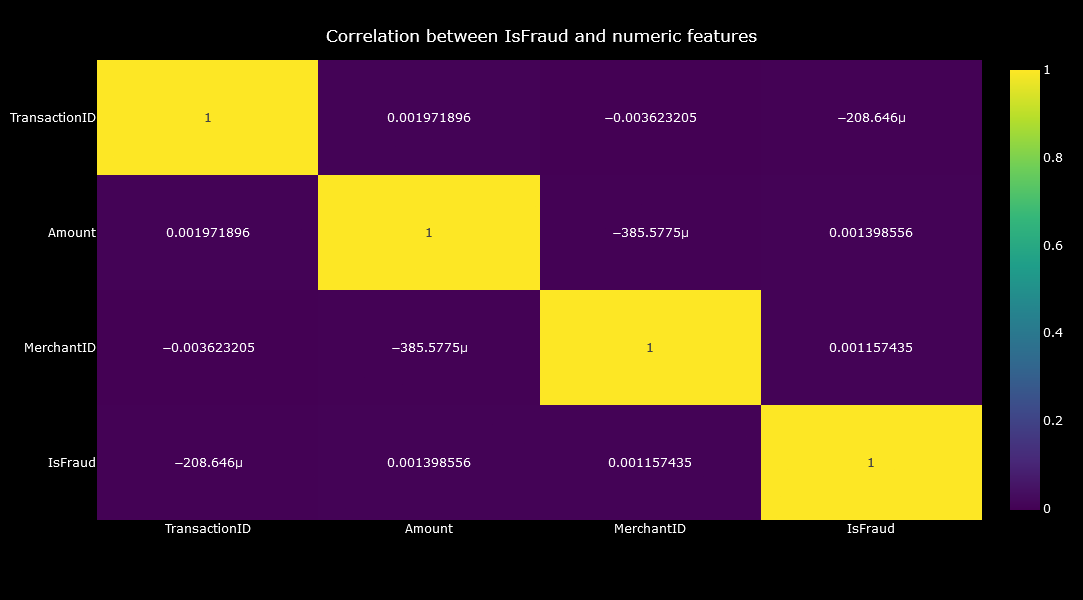

In [38]:
#Selecting numerical columns only.
numeric_features = cf.select_dtypes(include=['float64', 'int64']).columns

#Defining calculate correlation matrix on numeric features only.
correlation_matrix = cf[numeric_features].corr()

#Checking correlations with 'IsFraud' defined.
fraud_correlation = correlation_matrix['IsFraud'].sort_values(ascending=False)
print("Correlations with 'IsFraud':")
print(fraud_correlation)


#Library that generates interactive web-based visualizations.
import plotly.express as px
#Plotting Visualizing heatmap correlation.
correlation_matrix = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='viridis', aspect='auto')

#Naming heatmap title, setting figure size, and background color.
correlation_matrix.update_layout(
    title={
        'text': 'Correlation between IsFraud and numeric features',
        'x': 0.5,  #Centering the title.
        'xanchor': 'center',  #Ensure the title is centered.
        'yanchor': 'top'
     },
     paper_bgcolor='black', #For background color outside the plot area.
     plot_bgcolor='black',  #For background color of the plot area.
     font_color='white', #Changing the font color to white for readability and visibility.
     height=600    #Height in pixels.
)

#Displaying the correlation matrix heatmap.
correlation_matrix.show()

# 3. Pattern Recognition:
+ Use clustering techniques to group transactions and identify unusual patterns.

<font size='4'>3.1 Data Preparation and Preprocessing.</fontsize>

In [43]:
# Drop the original datetime column.
cf = cf.drop(columns=['TransactionDate'])

In [45]:
#Separating features(X) and target variable(Y).
X = cf.drop('IsFraud', axis=1)
y = cf['IsFraud']

#Checking for non-numeric columns.
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['TransactionType', 'Location', 'Month', 'clocksystem'], dtype='object')


In [47]:
#Use one-hot encoding to convert categorical columns to numeric
X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

In [49]:
from sklearn.preprocessing import StandardScaler

#scale to ensure consistent and effective performance across models.
#Scaling the features(x)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<font size='4'>3.2 Clustering with K-means and DBSCAN. </fontsize>

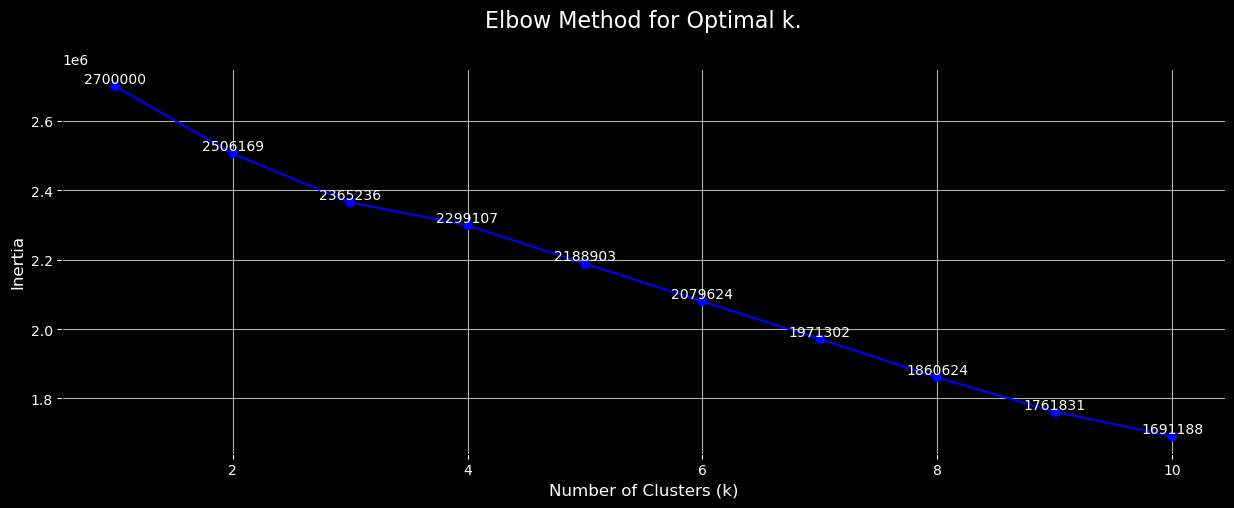

In [52]:
from sklearn.cluster import KMeans, DBSCAN

# __________Clustering with KMeans___________  #

#Determine the optimal number of clusters (k) using the elbow method.
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Plotting the elbow graph to choose the best k.
plt.figure(figsize=(15, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
#Plot the elbow curve.
plt.plot(K, inertia, 'bo-')

#Adding values on top of the points.
for i, (k, iner) in enumerate(zip(K, inertia)):
    plt.text(k, iner, f'{iner:.0f}', ha='center', va='bottom', color='white')

#Setting and customizing the chart title and labels.
plt.title('Elbow Method for Optimal k.', color='white',fontsize='16',pad='30')
plt.xlabel('Number of Clusters (k)', color='white', fontsize='12')
plt.ylabel('Inertia', color='white', fontsize='12')

#customizing tick parameters.
ax.tick_params(axis='x', colors='white', labelsize=10)
ax.tick_params(axis='y', colors='white', labelsize=10)

#Adding grid lines on both the x-axis and the y-axis.
ax.grid(True)

#Display the elbow graph.
plt.show()

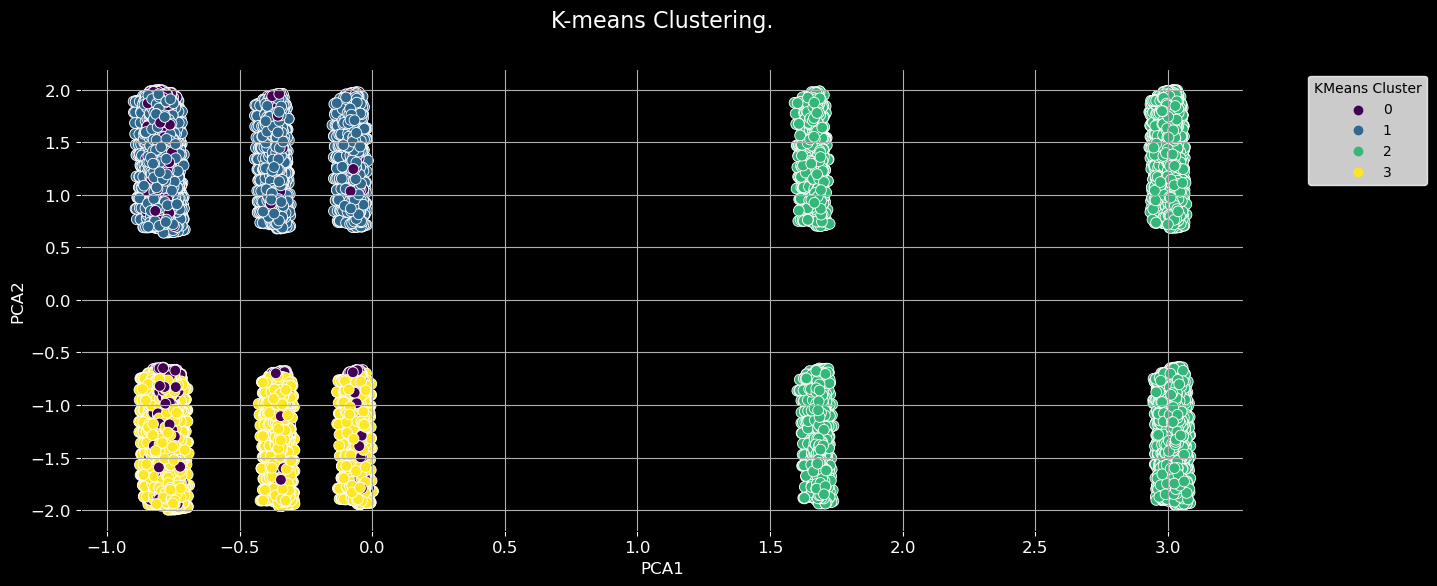

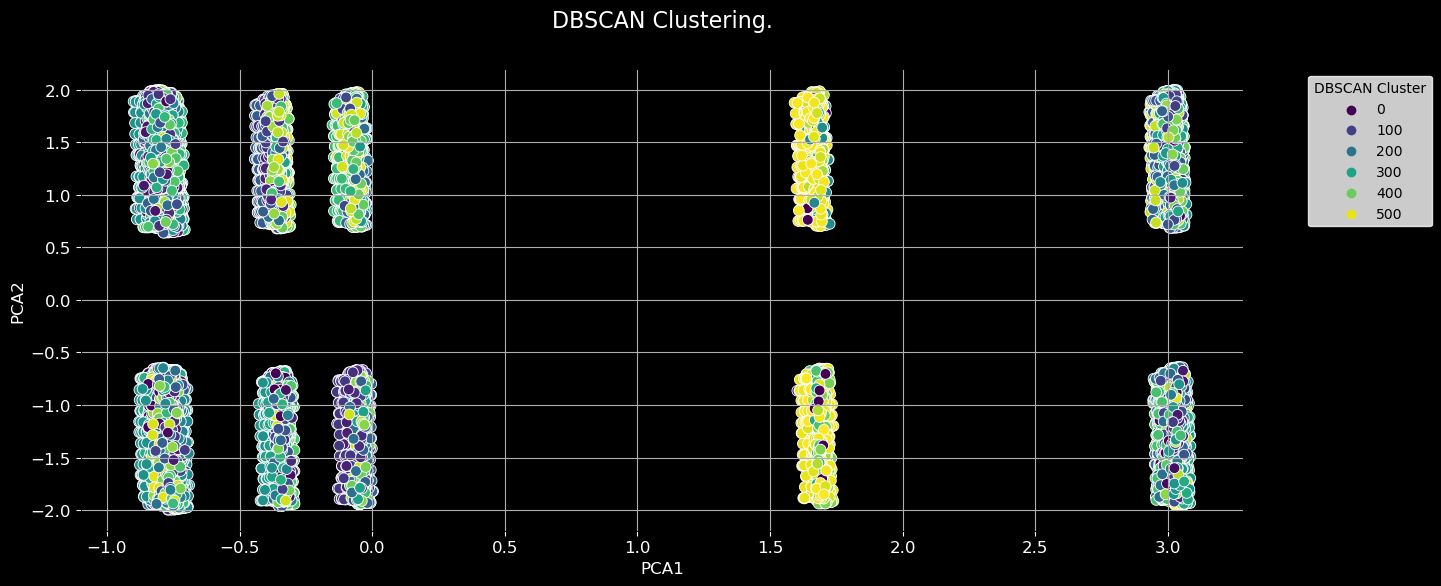

In [54]:
from sklearn.decomposition import PCA

#Choose k based on the elbow point, k=4 is adjust based on the data's elbow point.
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
cf['KMeans_Cluster'] = kmeans_labels  #Added K-means cluster labels to data.

#_____________      Clustering with DBSCAN _______________________#
#Setting parameters for DBSCAN.
dbscan = DBSCAN(eps=1.5, min_samples=10)  #Adjusting eps and min_samples as needed.
dbscan_labels = dbscan.fit_predict(X_scaled)
cf['DBSCAN_Cluster'] = dbscan_labels  #Added DBSCAN cluster labels to data.

#________________ Visualization and Analysis ____________________________#
#Reduce data dimensions for visualization using PCA.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
cf['PCA1'] = X_pca[:, 0]
cf['PCA2'] = X_pca[:, 1]

# _________________________________       Visualize K-means clusters    _____________________________#
#Plotting a scatter plot of K-means clusters.
plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.scatterplot(data=cf, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', s=60)

#Setting and customizing the chart title and labels.
plt.title('K-means Clustering.', color='white',fontsize="16",pad="30")
plt.xlabel('PCA1', color='white',fontsize='12')
plt.ylabel('PCA2', color='white',fontsize='12')
#customizing tick parameters.
ax.tick_params(colors='white',labelsize='12') 
#Plotting legend and labeling it.
plt.legend(title='KMeans Cluster', bbox_to_anchor=(1.05, 1),loc='upper left', edgecolor='white', title_fontsize='10')
#Adding grid lines on both the x-axis and the y-axis.
plt.grid(True)
#Display the Kmean cluster plot.
plt.show()

# ______________________          Visualize DBSCAN clusters (Cluster -1 indicates outliers)   _________________________#
#Plotting a scatter plot of DBSCAN clusters.
plt.figure(figsize=(15, 6), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.scatterplot(data=cf, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='viridis', s=60)

#Setting and customizing the chart title and labels.
plt.title('DBSCAN Clustering.', color='white',fontsize='16',pad='30')
plt.xlabel('PCA1', color='white',fontsize='12')
plt.ylabel('PCA2', color='white', fontsize='12')
#customizing tick parameters.
ax.tick_params(colors='white',labelsize='12') 
#Plotting legend and labeling it.
plt.legend(title='DBSCAN Cluster',bbox_to_anchor=(1.05, 1),loc='upper left', edgecolor='white',title_fontsize='10')
#Adding grid lines on both the x-axis and the y-axis.
plt.grid(True)
#Display DBSCAN cluster plot.
plt.show()

In [56]:
#Analyze each cluster’s fraud distribution
kmeans_fraud_dist = cf.groupby('KMeans_Cluster')['IsFraud'].value_counts(normalize=True).unstack()
dbscan_fraud_dist = cf.groupby('DBSCAN_Cluster')['IsFraud'].value_counts(normalize=True).unstack()

#Displaying K-means Fraud Distribution by Cluster.
print("K-means Fraud Distribution by Cluster:")
print(kmeans_fraud_dist)
#Displaying DBSCAN Fraud Distribution by Cluster.
print("\nDBSCAN Fraud Distribution by Cluster:")
print(dbscan_fraud_dist)

K-means Fraud Distribution by Cluster:
IsFraud                0         1
KMeans_Cluster                    
0               0.989914  0.010086
1               0.988850  0.011150
2               0.990793  0.009207
3               0.990712  0.009288

DBSCAN Fraud Distribution by Cluster:
IsFraud                0         1
DBSCAN_Cluster                    
-1              1.000000       NaN
 0              0.990521  0.009479
 1              0.971193  0.028807
 2              0.995745  0.004255
 3              0.994898  0.005102
...                  ...       ...
 516            1.000000       NaN
 517            1.000000       NaN
 518            0.984615  0.015385
 519            0.979167  0.020833
 520            1.000000       NaN

[522 rows x 2 columns]


# 4.MODEL SELECTION AND BUILDING.

<font size ='4'> 4.1  Data Preparation and Preprocessing.</fontsize>
+ First checking if all columns are numeric and split the data for training and testing.

In [60]:
# Drop the original datetime column
#cf = cf.drop(columns=['TransactionDate'])

In [62]:
#Separating features(X) and target variable(Y).
X = cf.drop('IsFraud', axis=1)
y = cf['IsFraud']

In [64]:
#Checking for non-numeric columns.
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['TransactionType', 'Location', 'Month', 'clocksystem'], dtype='object')


In [66]:
#Using one-hot encoding to convert categorical columns to numeric.
X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

In [68]:
! pip install xgboost imbalanced-learn

+ Resampling the data using SMOTE (Synthetic Minority Over-sampling Technique), will allow my models to be trained on a balanced dataset and improving models ability to predict both classes.

In [71]:
from sklearn.model_selection import train_test_split
#Split data for training and testing sets that is 80% train, 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE
#Resample the data using SMOTE for handling class imbalance.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

<font size='4'>4.2 Initializing and training the models to make Predictions. </fontsize>

In [74]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#Training my 3 models.

#Model 1: Decision Tree Classifier model.
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_resampled, y_resampled)
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]

#Model 2: Extreme Gradient Boosting(XGBoost) model.
xgb_model = XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), random_state=42, eval_metric='logloss')
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

#Model 3: Neural Network Classifier model.
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
nn_model.fit(X_resampled, y_resampled)
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_prob = nn_model.predict_proba(X_test)[:, 1]

# 5. MODELS PERFORMANCE EVALUTION.
+ Accuracy: This shows the overall correctness of the model proportion of correct predictions. 
+ Precision: Shows how many of the transactions predicted as fraudulent are actually fraudulent hence useful to minimize false positives. 
+ Recall: Shows how many of the actual fraudulent transactions were correctly identified it us useful to minimize false negatives. 
+ F1 Score: It is the harmonic mean of precision and recall, providing a balance between the two especially important in imbalanced datasets.
+ AUC-ROC (Area Under the Receiver Operating Characteristic curve) metric measures a model's ability to correctly distinguish between fraudulent and legitimate transactions. 

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
#____________________ Evaluation of the models ______________________________________#

#Defining a  function to evaluate all models
def evaluate_model(y_test, y_pred, y_pred_prob):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))
    
    return accuracy, precision, recall, f1, auc_roc

#Displaying evaluation of each model.
print("Decision Tree Classifier Model Performance:")
dt_metrics = evaluate_model(y_test, y_pred_dt, y_pred_dt_prob)

print("\nExtreme Gradient Boosting(XGBoost) Model Performance:")
xgb_metrics = evaluate_model(y_test, y_pred_xgb, y_pred_xgb_prob)

print("\nNeural Network Classifier model Performance:")
nn_metrics = evaluate_model(y_test, y_pred_nn, y_pred_nn_prob)

Decision Tree Classifier Model Performance:
Accuracy: 0.9767
Precision: 0.0126
Recall: 0.0159
F1 Score: 0.0141
AUC-ROC: 0.5014

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29686
           1       0.01      0.02      0.01       314

    accuracy                           0.98     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.98      0.98      0.98     30000


Extreme Gradient Boosting(XGBoost) Model Performance:
Accuracy: 0.7891
Precision: 0.0120
Recall: 0.2357
F1 Score: 0.0229
AUC-ROC: 0.5184

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     29686
           1       0.01      0.24      0.02       314

    accuracy                           0.79     30000
   macro avg       0.50      0.52      0.45     30000
weighted avg       0.98      0.79      0.87     30000


Neural Network Classifier model 

<font size='4'>5.1 Visualization. </fontsize>
+ Display model Accuracy, Precision,Recall, F1 Score and AUC-ROC curves.

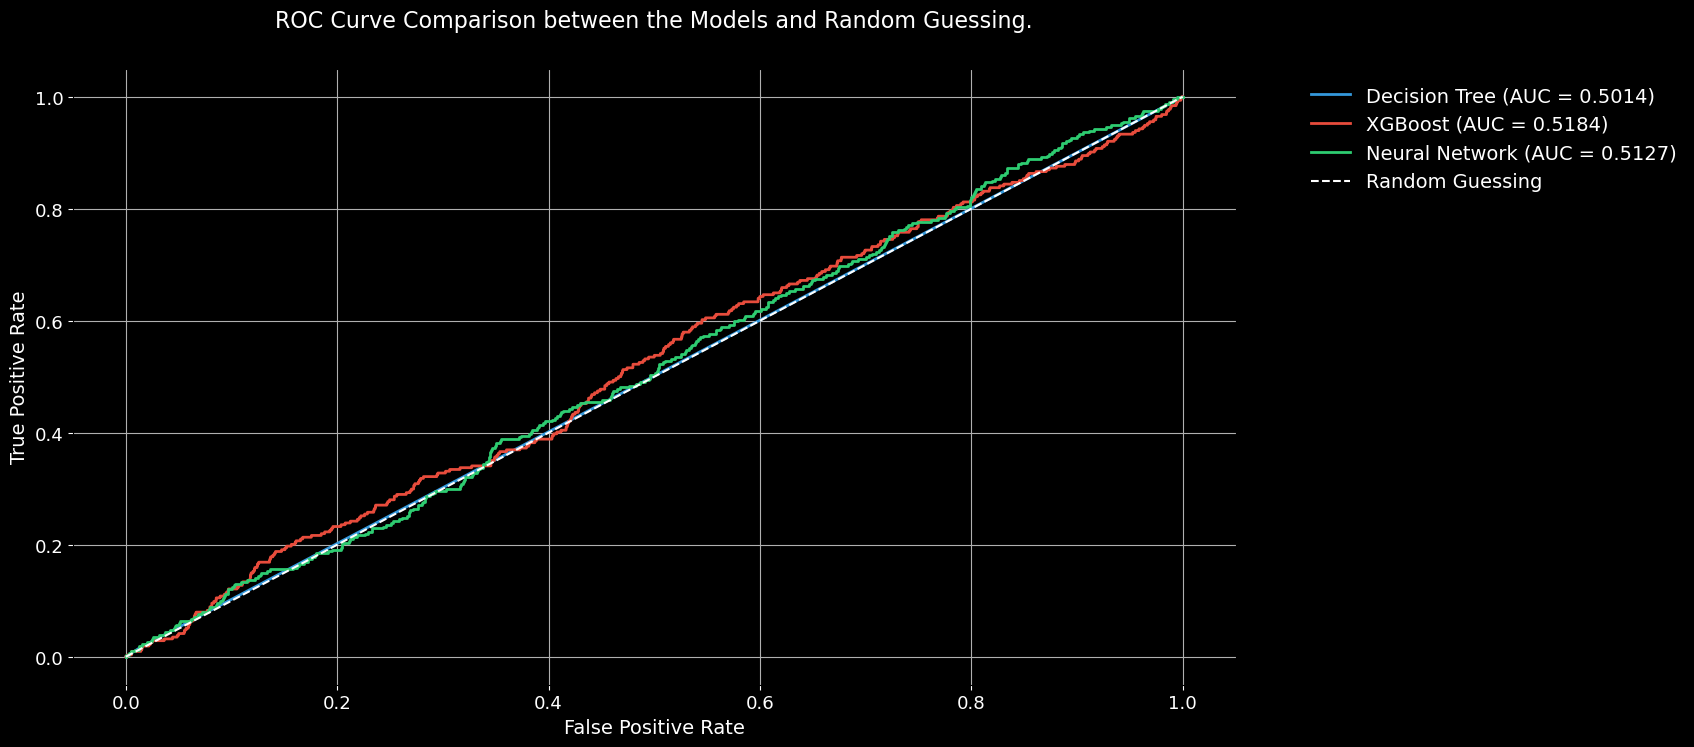

In [80]:
#First is the ROC Curves for each model.

#Define the data of each model to use.
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_prob)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_prob)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_prob)

#Plotting a line plot of ROC Curves.
plt.figure(figsize=(15, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
#Plot the ROC curves for each model.
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.4f})'.format(dt_metrics[4]), color='#3498db', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.4f})'.format(xgb_metrics[4]), color='#e74c3c', linewidth=2)
plt.plot(fpr_nn, tpr_nn, label='Neural Network (AUC = {:.4f})'.format(nn_metrics[4]), color='#2ecc71', linewidth=2)
#Plot the diagonal line for random guessing k.
plt.plot([0, 1], [0, 1],color='white', linestyle='--', label='Random Guessing')

#Setting and customizing the chart title and labels.
plt.title('ROC Curve Comparison between the Models and Random Guessing.', color='white', fontsize='16',pad='30')
plt.xlabel('False Positive Rate', color='white', fontsize='14')
plt.ylabel('True Positive Rate', color='white', fontsize='14')

#Plotting legend and labeling it.
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left',facecolor='black', edgecolor='white', labelcolor='white', frameon=False,fontsize='14')

#customizing tick parameters.
ax.tick_params(colors='white', labelsize='13')

#Adding grid lines on both the x-axis and the y-axis.
plt.grid(True)

#Display the ROC curve plot.
plt.show()

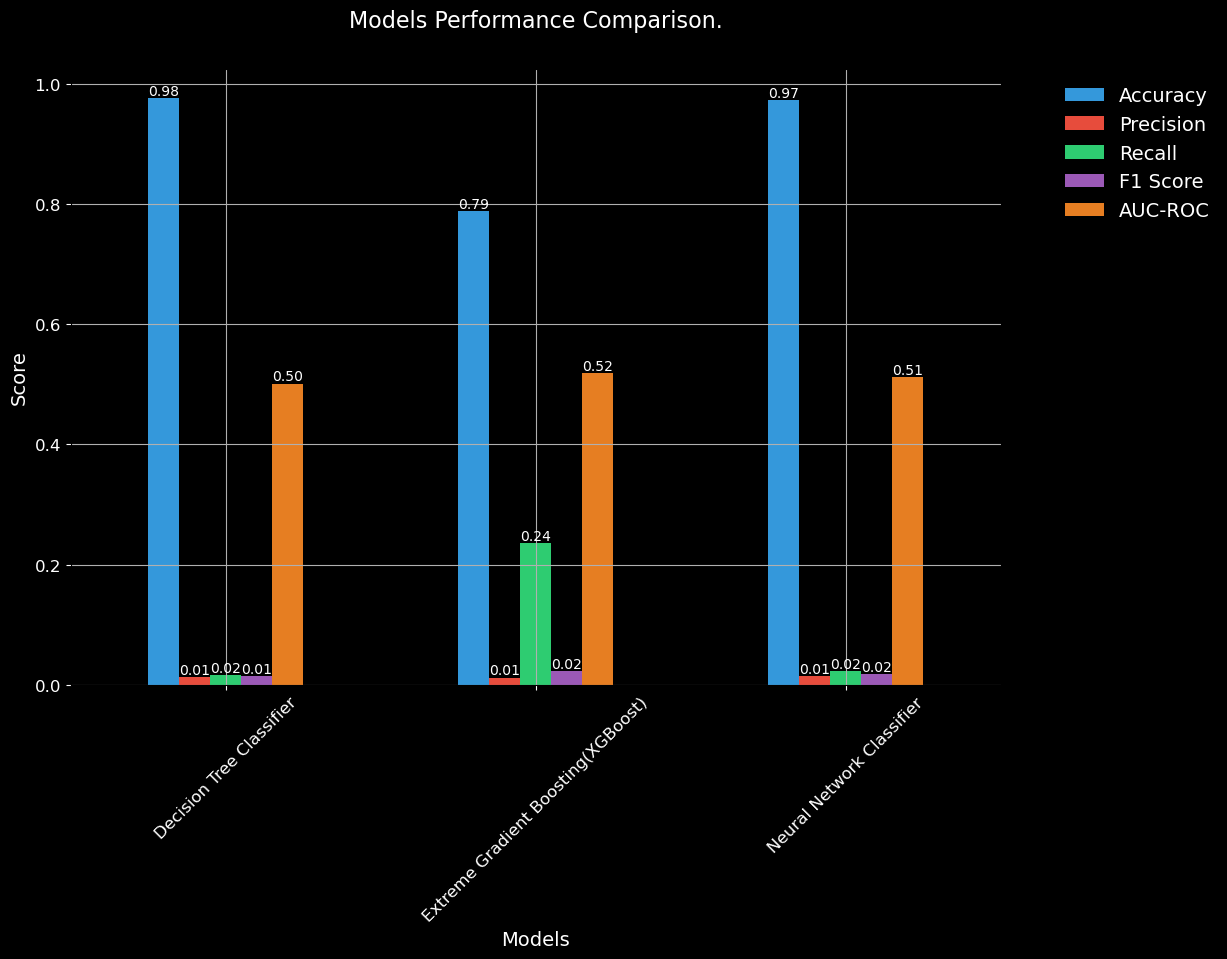

In [82]:
#Creating Bar Plot of Metrics for Each Model.
metrics = {
    "Model": ["Decision Tree Classifier", "Extreme Gradient Boosting(XGBoost)", "Neural Network Classifier"],
    "Accuracy": [dt_metrics[0], xgb_metrics[0], nn_metrics[0]],
    "Precision": [dt_metrics[1], xgb_metrics[1], nn_metrics[1]],
    "Recall": [dt_metrics[2], xgb_metrics[2], nn_metrics[2]],
    "F1 Score": [dt_metrics[3], xgb_metrics[3], nn_metrics[3]],
    "AUC-ROC": [dt_metrics[4], xgb_metrics[4], nn_metrics[4]]
}
metrics_df = pd.DataFrame(metrics).set_index('Model')

#Plotting the bar chart model performance comparison.
plt.figure(figsize=(12, 5), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
bars = metrics_df.plot(kind='bar', figsize=(12, 8), color=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#e67e22'], ax=ax)

#Displaying values on top of each bar.
for container in bars.containers:
    bars.bar_label(container, fmt='%.2f', label_type='edge', color='white', fontsize=10)

#Setting and customizing the chart title and labels.
plt.title('Models Performance Comparison.', color='white', fontsize='16',pad='30')
plt.xlabel('Models', color='white',fontsize='14')
plt.ylabel('Score', color='white', fontsize='14')

#customizing tick parameters.
ax.tick_params(colors='white', labelsize='12') 
plt.xticks(rotation=45, color='white', fontsize='12')

#Plotting legend and labeling it.
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', frameon=False, facecolor='black', labelcolor='white',fontsize='14')

#Adding grid lines on both the x-axis and the y-axis.
plt.grid(True)

#Display the bar chart model performance comparison plot.
plt.show()

# 6. FEATURE IMPORTANCE ANALYSIS.
+ Just used Extreme Gradient Boosting(XGBoost) and Decision Tree models to provide feature importance scores indicating how each feature influences the prediction of fraud.

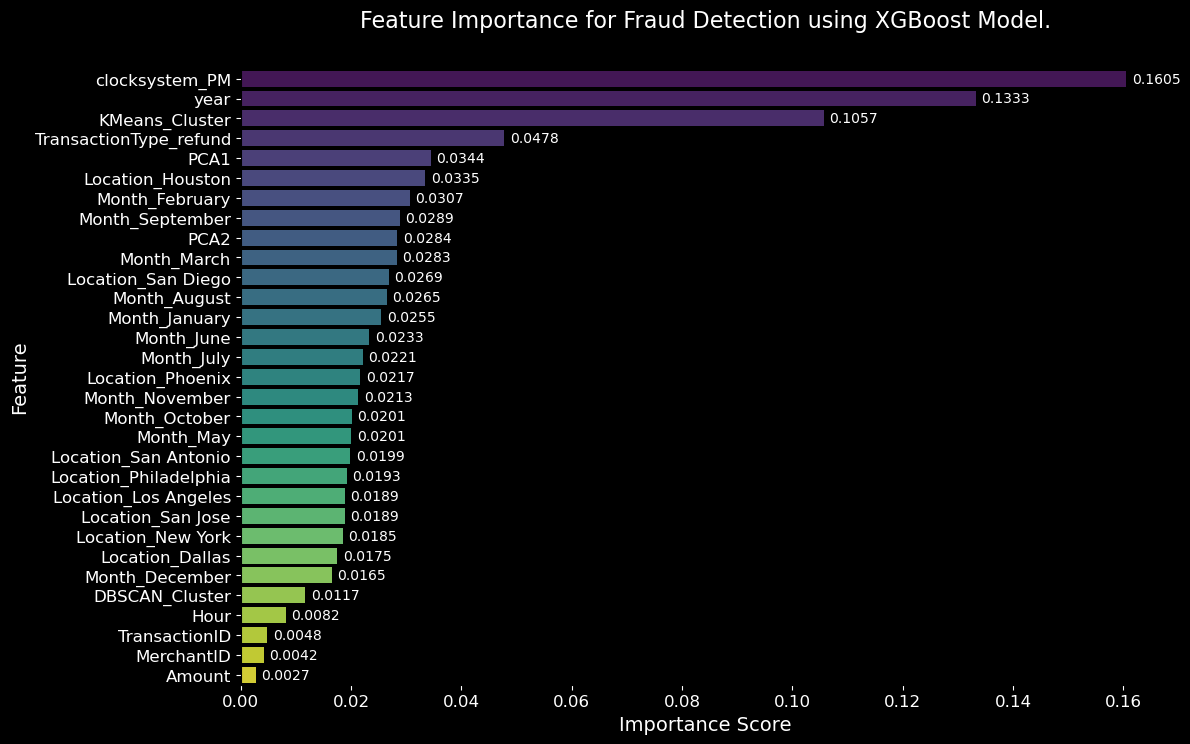

In [85]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#Set random_state to enhance reproducibility.
RANDOM_STATE = 42

#Split data for training and testing sets that is 80% train, 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

#Appling a SMOTE with a fixed random_state so as to balanced dataset.
smote = SMOTE(random_state=RANDOM_STATE)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#Defineing and training the XGBoost model.
xgb_model = XGBClassifier(random_state=RANDOM_STATE)
xgb_model.fit(X_resampled, y_resampled)

#Extracting feature importance.
importance_scores = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'XGB_Importance': importance_scores})

#Sort feature importance data by 'XGB_Importance' in descending order
feature_importance_df = feature_importance_df.sort_values(by='XGB_Importance', ascending=False)

#Plotting a bar plot analysis feature importance.
plt.figure(figsize=(12, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
sns.barplot(x='XGB_Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Display values on top of the bars
for i, (importance, feature) in enumerate(zip(feature_importance_df['XGB_Importance'], feature_importance_df['Feature'])):
    plt.text(importance + 0.001, i, f'{importance:.4f}', color='white', va='center')

#Setting and customizing the chart title and labels.
plt.title('Feature Importance for Fraud Detection using XGBoost Model.', color='white', fontsize='16', pad='30' )
plt.xlabel('Importance Score', color='white', fontsize='14')
plt.ylabel('Feature', color='white', fontsize='14')

#customizing tick parameters.
ax.tick_params(colors='white', labelsize='12')

#Displaying the bar plot.
plt.show()

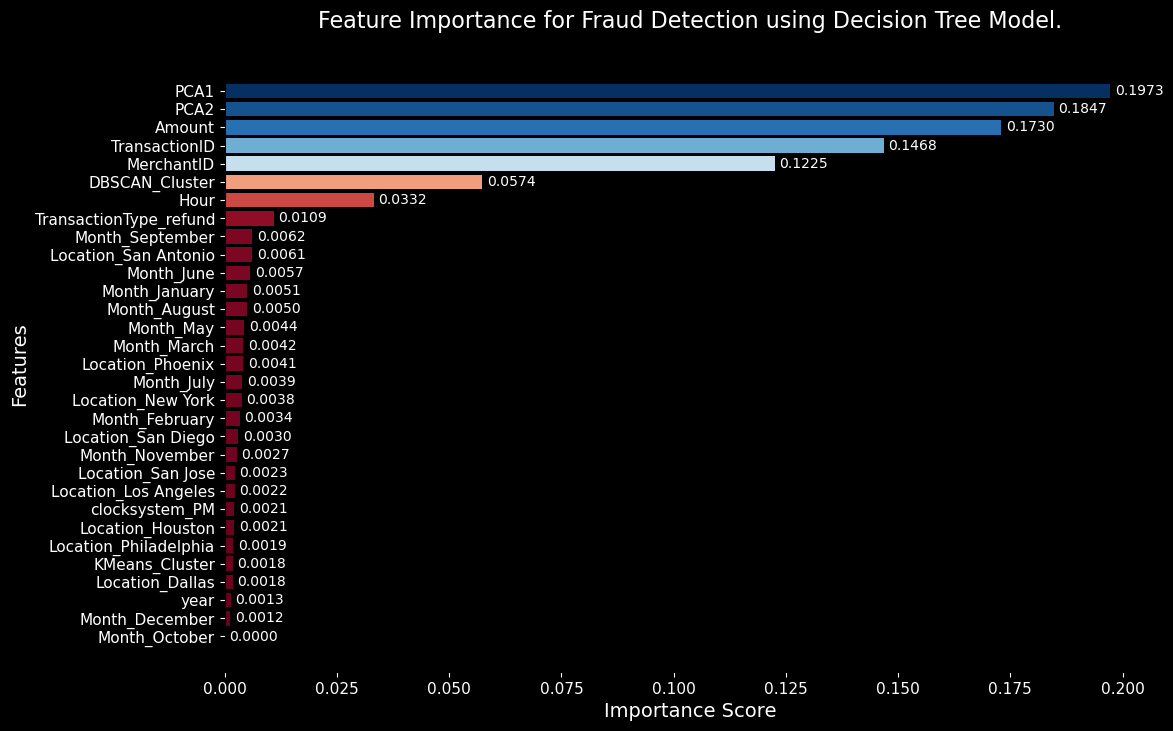

In [87]:
#Defining and train the Decision Tree Classifier model.
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#Extracting the feature importance.
feature_importances = dt_model.feature_importances_

#Creating a DataFrame for better visualization.
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

#Normalize the importance values for color mapping
norm = plt.Normalize(min(importance_df['Importance']), max(importance_df['Importance']))
colors = plt.cm.RdBu(norm(importance_df['Importance']))

#Plot a bar graph of feature importance.
plt.figure(figsize=(12, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)

#Display values on top of the bars.
for bar in bars:
    plt.text(
        bar.get_width() + 0.001, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', va='center', color='white'
    )
#Setting and customizing the chart title and labels.
plt.title('Feature Importance for Fraud Detection using Decision Tree Model.', color='white', fontsize='16',pad='20')
plt.xlabel('Importance Score', color='white', fontsize='14')
plt.ylabel('Features', color='white', fontsize='14')

#customizing tick parameters.
plt.gca().invert_yaxis()  # Highest importance at the top
ax.tick_params(colors='white', labelsize='11')

#Displaying a bar plot.
plt.show()

Feature Importance scores of Decision Tree model vs XGBoost model:
                   Feature  Importance_DT  Importance_XGB
30          clocksystem_PM       0.002139        0.160531
3                     year       0.001283        0.133283
5           KMeans_Cluster       0.001823        0.105720
9   TransactionType_refund       0.010935        0.047770
7                     PCA1       0.197302        0.034439
11        Location_Houston       0.002091        0.033478
21          Month_February       0.003382        0.030703
29         Month_September       0.006155        0.028897
8                     PCA2       0.184719        0.028357
25             Month_March       0.004156        0.028306
17      Location_San Diego       0.002991        0.026854
19            Month_August       0.005014        0.026521
22           Month_January       0.005054        0.025516
24              Month_June       0.005669        0.023295
23              Month_July       0.003947        0.022105
15   

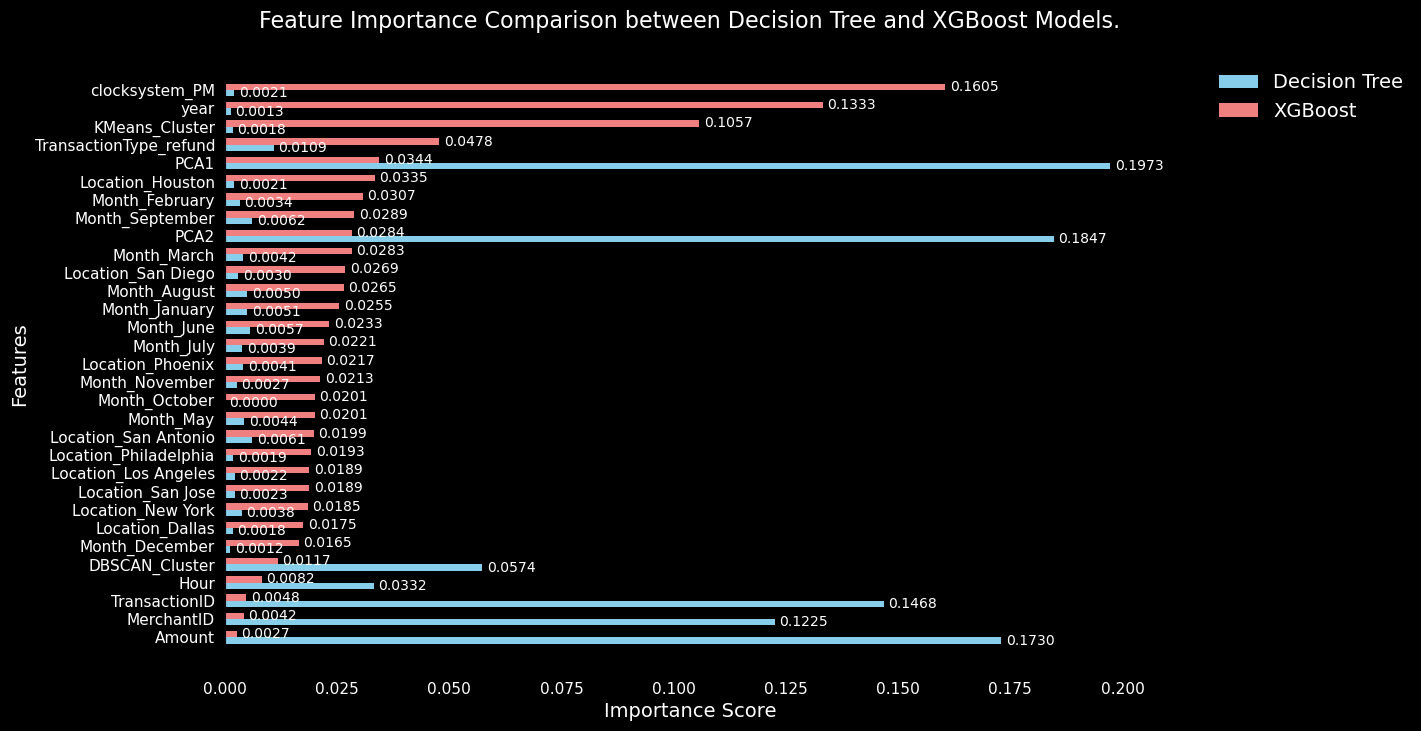

In [89]:
# Combine feature importances from both models
dt_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance_DT': dt_model.feature_importances_
})

xgb_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance_XGB': xgb_model.feature_importances_
})

importances_df = pd.merge(dt_importances, xgb_importances, on='Feature').sort_values(by='Importance_XGB', ascending=False)
print('Feature Importance scores of Decision Tree model vs XGBoost model:')
print(importances_df)

#Merge the two dataframes on Feature.
importances_df = pd.merge(dt_importances, xgb_importances, on='Feature')
importances_df = importances_df.sort_values(by='Importance_XGB', ascending=False)

#Plotting the comparison bar graph.
plt.figure(figsize=(12, 8), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
#Setting bar chart positions.
indices = np.arange(len(importances_df))
width = 0.35

#Plotting both sets of importance.
bars1 = plt.barh(indices + width/2, importances_df['Importance_DT'], width, label='Decision Tree', color='skyblue')
bars2 = plt.barh(indices - width/2, importances_df['Importance_XGB'], width, label='XGBoost', color='lightcoral')

#Display values on top of the both bars.
for bar in bars1:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center', color='white')
for bar in bars2:
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center', color='white')

#Setting and customizing the chart title and labels.
plt.title('Feature Importance Comparison between Decision Tree and XGBoost Models.', color='white', fontsize='16', pad='20')
plt.xlabel('Importance Score', color='white', fontsize='14')
plt.ylabel('Features', color='white', fontsize='14')

#Plotting legend and labeling it.
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', frameon=False, facecolor='black', labelcolor='white',fontsize='14')

#customizing tick parameters.
plt.yticks(indices, importances_df['Feature'], color='white', fontsize='11')
plt.xticks(color='white', fontsize='11')
plt.gca().invert_yaxis()  #Highest importance at the top.

#Displaying the bar plot graph.
plt.show()